In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)

# Datasets

### Dataset CMAPSS


In [6]:
ruta_dataset = '../data/raw/train_FD001.txt'

headers = [
    "unit_number",
    "time_cycles",
    "operational_setting_1",
    "operational_setting_2",
    "operational_setting_3"]
headers += [f"sensor_{i}" for i in range(1, 22)]

df_FD001 = pd.read_csv(ruta_dataset, delim_whitespace=True, header=None, names=headers)

df = df_FD001.copy()
sensores = ['sensor_2', 'sensor_9']
df = df[sensores]
df['conteo'] = range(1, len(df) + 1)
df = df[['conteo'] + sensores]
df.head()

/tmp/ipykernel_6464/1392809727.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_FD001 = pd.read_csv(ruta_dataset, delim_whitespace=True, header=None, names=headers)


,conteo,sensor_2,sensor_9
0,1,641.82,9046.19
1,2,642.15,9044.07
2,3,642.35,9052.94
3,4,642.35,9049.48
4,5,642.37,9055.15


In [26]:
df_FD001.to_csv('../data/processed/FD001_processed.csv', index=False)

### Dataset Battery


In [20]:
ruta_dataset = '../data/raw/battery00.csv'
df_battery = pd.read_csv(ruta_dataset)
variables = ['time', 'temperature_battery']

df_battery = df_battery[variables]

df_battery.head()

,time,temperature_battery
0,0.000,0.000
1,1.894,23.059
2,2.814,23.059
3,3.734,23.063
4,4.654,23.063


In [21]:
# Crear columna de tiempo absoluto (si no existe)
df_battery['timestamp'] = pd.to_timedelta(df_battery['time'], unit='s')

# Reindexar a intervalo uniforme de 1 segundo
#df_battery = df_battery.set_index('timestamp').resample('1S').interpolate()

In [22]:
df_battery.drop(['time'], axis=1, inplace = True)
orden  = ['timestamp', 'temperature_battery']
df_battery = df_battery[orden]
df_battery.head()

,timestamp,temperature_battery
0,0 days 00:00:00,0.000
1,0 days 00:00:01.894000,23.059
2,0 days 00:00:02.814000,23.059
3,0 days 00:00:03.734000,23.063
4,0 days 00:00:04.654000,23.063


In [ ]:
df_battery.to_csv('../data/processed/battery_processed.csv')

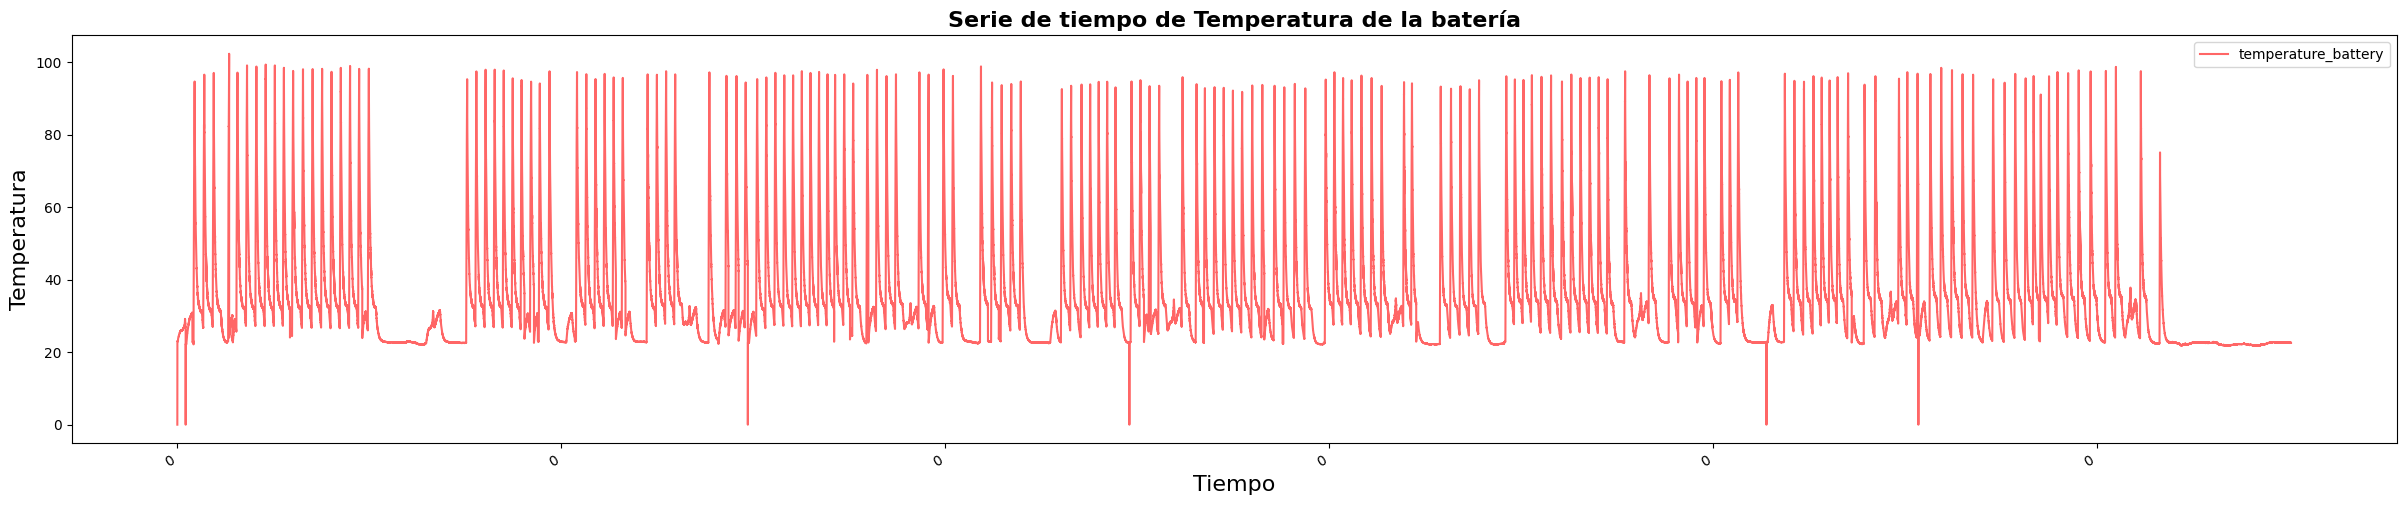

In [24]:
ax = df_battery.plot(
    x = 'timestamp',
    y = 'temperature_battery',
    figsize=(30, 6),
    title=f'Serie de la temperatura de la batería',
    alpha = 0.6,
    color = 'red')

# Convertir ticks de nanosegundos a días
xticks = ax.get_xticks()
xticks_dias = (xticks / 1e9 / 3600 / 24).astype(int)  # nanosegundos → segundos → horas → días
ax.set_xticklabels(xticks_dias)

ax.set_xlabel('Tiempo', fontsize=16)
ax.set_ylabel('Temperatura', fontsize=16)
ax.set_title(f'Serie de tiempo de Temperatura de la batería', fontsize=16, fontweight='bold')
#plt.savefig(f"img/1_{sensor}.png")
plt.show()